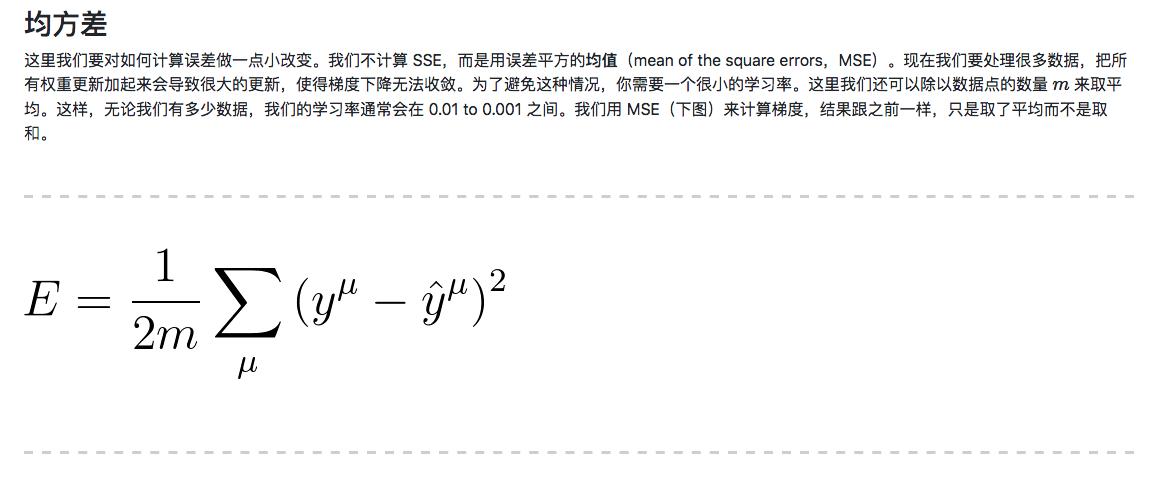

In [3]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [5]:
features

,gre,gpa,rank_1,rank_2,rank_3,rank_4
209,-0.066657,0.289305,0,1,0,0
280,0.625884,1.445476,0,1,0,0
33,1.837832,1.603135,0,0,1,0
210,1.318426,-0.131120,0,0,0,1
93,-0.066657,-1.208461,0,1,0,0
84,-0.759199,0.552071,0,0,1,0
329,-0.759199,-1.208461,0,0,0,1
94,0.625884,0.131646,0,1,0,0
266,-0.239793,-0.393886,0,0,0,1
126,0.106478,0.394412,1,0,0,0


In [6]:
features.values

array([[-0.06665712,  0.28930534,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.62588442,  1.44547565,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.83783211,  1.60313523,  0.        ,  0.        ,  1.        ,
         0.        ],
       ...,
       [-0.41292789, -0.57782239,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.62588442,  1.60313523,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.41292789, -0.28877981,  1.        ,  0.        ,  0.        ,
         0.        ]])

In [10]:
import numpy as np
# from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        h = np.dot(weights,x)
        output = sigmoid(h)

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        error_term = error * sigmoid(h) * (1 - sigmoid(h))

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += learnrate * error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += del_w / len(targets)

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.26276093849966364
Train loss:  0.20928619409324895
Train loss:  0.20084292908073417
Train loss:  0.1986215647552789
Train loss:  0.19779851396686018
Train loss:  0.19742577912189863
Train loss:  0.19723507746241065
Train loss:  0.19712945625092465
Train loss:  0.19706766341315074
Train loss:  0.19703005801777368
Prediction accuracy: 0.725
